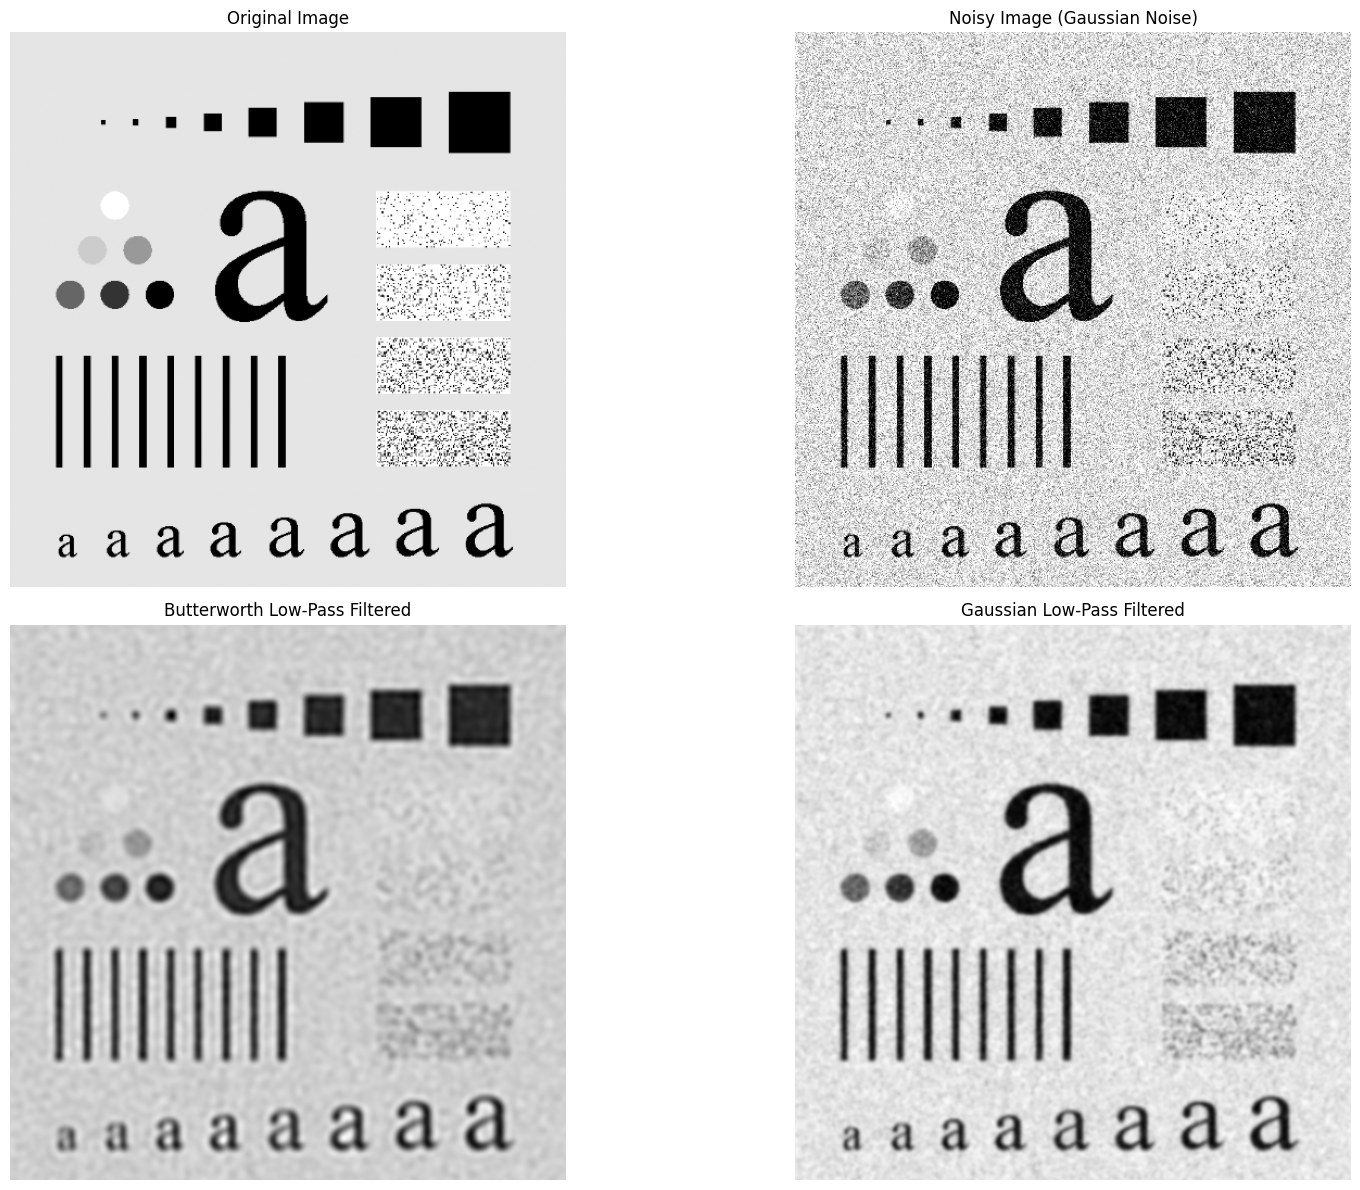

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=50):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image.astype(np.uint8)

def butterworth_lowpass_filter(D, cutoff, order=4):
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

def gaussian_lowpass_filter(D, cutoff):
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

def apply_dft(image):
    dft = np.fft.fft2(image)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted

def apply_idft(dft_shifted):
    idft_shifted = np.fft.ifftshift(dft_shifted)
    reconstructed_image = np.fft.ifft2(idft_shifted).real
    return reconstructed_image

# Load a 512x512 grayscale image
image_path = "img3.tif"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure image is 512x512
original_image = cv2.resize(original_image, (512, 512))

# Add Gaussian noise
noisy_image = add_gaussian_noise(original_image, sigma=50)

# Apply DFT to noisy image
dft_noisy = apply_dft(noisy_image)

# Get the distance matrix D
rows, cols = noisy_image.shape
u = np.arange(rows) - rows // 2
v = np.arange(cols) - cols // 2
U, V = np.meshgrid(v, u)
D = np.sqrt(U**2 + V**2)

# Create Butterworth and Gaussian Low-Pass Filters
cutoff_frequency = 50
H_butterworth = butterworth_lowpass_filter(D, cutoff_frequency)
H_gaussian = gaussian_lowpass_filter(D, cutoff_frequency)

# Apply filters in the frequency domain
butterworth_filtered_dft = dft_noisy * H_butterworth
gaussian_filtered_dft = dft_noisy * H_gaussian

# Convert filtered images back to the spatial domain
butterworth_filtered_image = apply_idft(butterworth_filtered_dft)
gaussian_filtered_image = apply_idft(gaussian_filtered_dft)

# Display Results
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(butterworth_filtered_image, cmap='gray')
plt.title('Butterworth Low-Pass Filtered')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Low-Pass Filtered')
plt.axis('off')

plt.tight_layout()